In [1]:
import re
import nltk
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
REPLACE_NO_SPACE = re.compile("[.;:!\'?,\"()\[\]]")
REPLACE_WITH_SPACE = re.compile("(<br\s*/<br\s*/)|(\-)|(\/)")

def preprocess_reviews(reviews):
    reviews = [REPLACE_NO_SPACE.sub("", line.lower()) for line in reviews]
    reviews = [REPLACE_WITH_SPACE.sub(" ", line) for line in reviews]
    
    return reviews

f = open("reviews_train.txt","r",encoding='UTF-8')
reviews_train = f.readlines()
f.close()
f = open("reviews_test.txt","r",encoding='UTF-8')
reviews_test = f.readlines()
f.close()


reviews_train_clean = preprocess_reviews(reviews_train)
reviews_test_clean = preprocess_reviews(reviews_test)


In [3]:
vectorizer = CountVectorizer(stop_words = 'english', max_features = 100)
vectorizer.fit(reviews_train_clean)
train = vectorizer.transform(reviews_train_clean)

#vectorizer.fit(reviews_test_clean)
test = vectorizer.transform(reviews_test_clean)

In [46]:
train = train.toarray()
positive_train = train[0: 12500]
negative_train = train[12500:25000]

test = test.toarray()
positive_test = test[0:12500]
negative_test = test[12500:25000]

label = np.ones(25000)
label[12500:25000] = 0

test_label = np.ones(25000)
test_label[12500:25000] = 0

AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

In [6]:
clf = SVC(gamma='auto', probability = True)
clf.fit(train, label)
svc = clf.predict_proba(test)
print(clf.score(test_label, svc))
fpr, tpr, thresholds = metrics.roc_curve(test_label, svc[:,1])

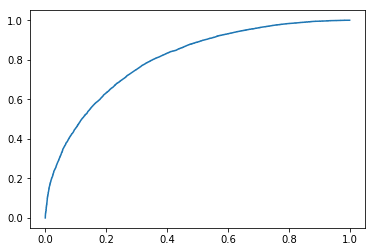

In [55]:
plt.plot(fpr,tpr)
plt.show()

In [56]:
neigh = KNeighborsClassifier(n_neighbors = 75)
neigh.fit(train, label)
knn = neigh.predict_proba(test)
print(neigh.score(test, test_label))

In [ ]:
print(neigh.score(test, test_label))

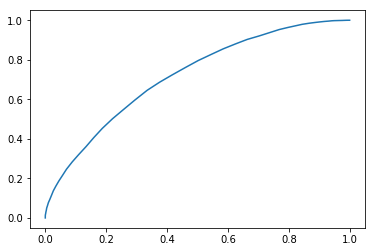

In [59]:
fpr, tpr, thresholds = metrics.roc_curve(test_label, knn[:,1])
plt.plot(fpr,tpr)
plt.show()